In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("estonia.csv")
df.columns

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')

In [3]:
df.head(6)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,F,71,P,0


In [8]:
MA=0
MM=0
MT=0
FA=0
FM=0
FT=0
A=0
M=0

for idx in range(len(df)):
    if df.loc[idx]['Sex'] == 'M' and df.loc[idx]['Age'] >18:
        MA += 1
    elif df.loc[idx]['Sex'] == 'M' and df.loc[idx]['Age'] <= 18:
        MM += 1
    elif df.loc[idx]['Sex'] == 'F' and df.loc[idx]['Age'] >18:
        FA += 1
    elif df.loc[idx]['Sex'] == 'F' and df.loc[idx]['Age'] <= 1:
        FM += 1

A = MA + FA
M = MM + FM
FT = FA + FM
MT = MA + MM

comTable = pd.DataFrame({
    'Male': [MA, MM, MT, A, M],
    'Female': [FA, FM, FT, A, M]    
})
comTable.index = ['Adult', 'Minor', 'Sex', 'Adult Total', 'Minor Total']

comTable.head()

,Male,Female
Adult,479,468
Minor,24,1
Sex,503,469
Adult Total,947,947
Minor Total,25,25


In [5]:
MS=0
MD=0
FS=0
FD=0

for idx in range(len(df)):
    if df.loc[idx]['Sex'] == 'M' and df.loc[idx]['Survived'] ==0:
        MS += 1
    elif df.loc[idx]['Sex'] == 'M' and df.loc[idx]['Survived'] ==1:
        MD += 1
    elif df.loc[idx]['Sex'] == 'F' and df.loc[idx]['Survived'] ==0:
        FS += 1
    elif df.loc[idx]['Sex'] == 'F' and df.loc[idx]['Survived'] == 1:
        FD += 1
        
comTable = pd.DataFrame({
    'Male': [MS, MD],
    'Female': [FS, FD],    
})
comTable.index = ['Survived', 'Died']

comTable.head()

,Male,Female
Survived,393,459
Died,110,27


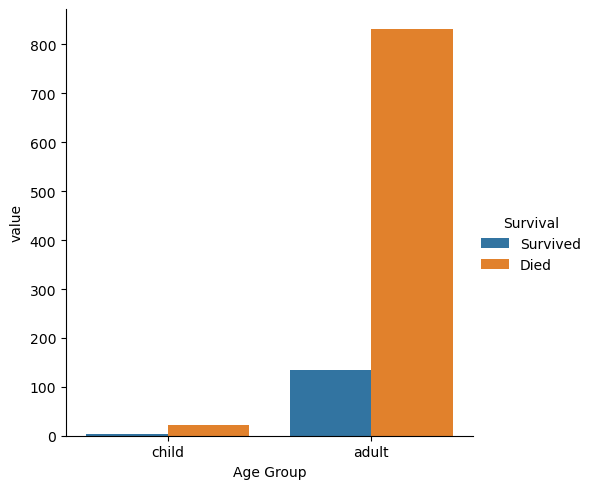

In [23]:
data={
    'Age Group': ['child', 'adult'],
    'Survived': [3, 134],
    'Died': [21, 831]
}
age_survival=pd.DataFrame(data)
age_survival=pd.melt(age_survival, id_vars='Age Group')
age_survival=age_survival.rename(columns={'variable': 'Survival'})

sns.catplot(data=age_survival, x="Age Group", y="value", hue="Survival", kind="bar")

In [14]:
PS=0
PD=0
CS=0
CD=0

for idx in range(len(df)):
    if df.loc[idx]['Category'] == 'P' and df.loc[idx]['Survived'] ==0:
        PD += 1
    elif df.loc[idx]['Category'] == 'P' and df.loc[idx]['Survived'] ==1:
        PS += 1
    elif df.loc[idx]['Category'] == 'C' and df.loc[idx]['Survived'] ==0:
        CD += 1
    elif df.loc[idx]['Category'] == 'C' and df.loc[idx]['Survived'] == 1:
        CS += 1
        
comTable = pd.DataFrame({
    'Category P': [PS, PD],
    'Category C': [CS, CD],    
})
comTable.index = ['Survived', 'Died']
comTable.head()

,Category P,Category C
Survived,98,39
Died,698,154


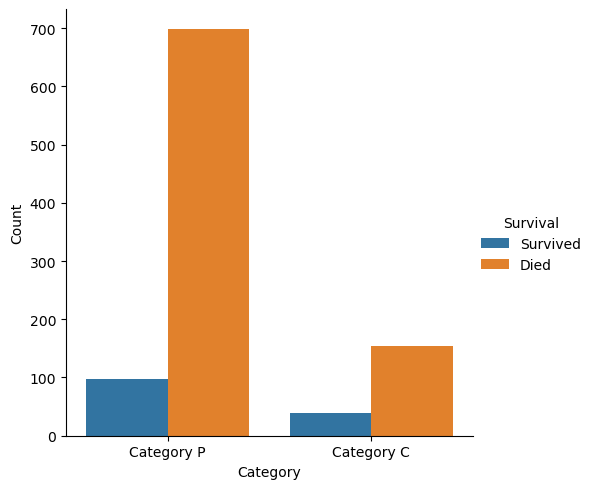

In [15]:
comTable_melt = comTable.reset_index().melt(id_vars='index', var_name='Category', value_name='Count')
comTable_melt.rename(columns={'index': 'Survival'}, inplace=True)
sns.catplot(data=comTable_melt, x='Category', y='Count', hue='Survival', kind='bar')